<a href="https://colab.research.google.com/github/Altemir1/Process-Mining/blob/main/alpha_miner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading event log

In [5]:
log = ""
file_name = "log2.txt"

with open(file_name, "r") as file:
  log = file.read()

print(len(log))

645


In [6]:
log_list = log.split("\n")
len(log_list)

50

In [10]:
for i in range(len(log_list)):
  split_event = log_list[i].split(" ")
  log_list[i] = split_event

log_list[0]

['A', 'B', 'E', 'G', 'F', 'H']

Extracting direct successions

In [13]:
from collections import defaultdict

direct_succession = set()
all_activities = set()

for trace in log_list:
  all_activities.update(trace)
  for i in range(len(trace) - 1):
    a, b = trace[i], trace[i+1]
    direct_succession.add((a, b))

print(len(direct_succession))
print(len(all_activities))

11
8


Build relation matrix

In [19]:
relation_matrix = defaultdict(str)

for a in all_activities:
  for b in all_activities:
    if (a,b) in direct_succession and (b,a) not in direct_succession:
      relation_matrix[(a, b)] = "->"
    elif (a,b) in direct_succession and (b,a) in direct_succession:
      relation_matrix[(a, b)] = "||"
    elif (a,b) not in direct_succession and (b,a) not in direct_succession:
      relation_matrix[(a,b)] = "#"
    elif (a,b) not in direct_succession and (b,a) in direct_succession:
      relation_matrix[(a,b)] = "<-"

Print relation matrix

In [20]:
activities = sorted(all_activities)
print("    " + "  ".join(activities))
for a in activities:
    row = [a]
    for b in activities:
        row.append(relation_matrix.get((a, b), ""))
    print("  ".join(row))

    A  B  C  D  E  F  G  H
A  #  ->  ->  #  #  #  #  #
B  <-  #  #  #  ->  #  #  #
C  <-  #  #  ->  #  #  #  #
D  #  #  <-  #  ->  #  #  #
E  #  <-  #  <-  #  ->  ->  #
F  #  #  #  #  <-  #  ||  ->
G  #  #  #  #  <-  ||  #  ->
H  #  #  #  #  #  <-  <-  #


In [22]:
!pip install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=336a43ba4ddabec04a96fdea1bea077632842a8207e3437918d2a197c28d3b9b
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


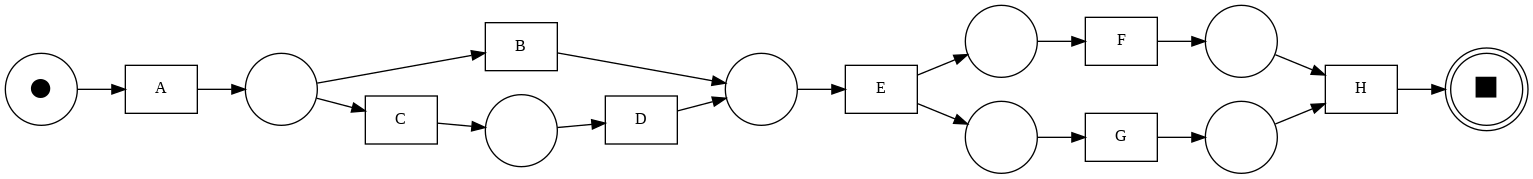

In [23]:
from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer


# Convert to pm4py EventLog object
log = EventLog()
for trace in log_list:
    t = Trace()
    for activity in trace:
        t.append(Event({"concept:name": activity}))
    log.append(t)

# Apply the Alpha Miner algorithm
net, initial_marking, final_marking = alpha_miner.apply(log)

# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)